In [1]:
import os
import csv
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

"""
### 합성 데이터 생성

year = "2020"
List=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
List_index = 2 ### 2020-01-01은 수요일. index 커지면서 요일 변경됨.
arrival = 13 ### 1시로 입장 시간 초기화
departure = 18 ### 6시로 퇴장 시간 초기화

hehehe=0### 월별로 변수를 만들어볼 거야 이번엔. 3,9월은 좀 늦게 입/퇴장한다.

fname = 'C:/Users/ASUS/Music/SyntheticData'
f = open(fname + '.csv', 'w')
wr = csv.writer(f)

### 1행에 항목 적어두기

f.write("Date")
f.write(',')
f.write("Day")
f.write(',')
f.write("Arrival")
f.write(',')
f.write("Departure")
f.write('\n')

for month in range (1,13): ### 1월부터 12월까지
    if month == 2:
        day_end = 28
    elif month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        day_end = 31
    elif month==4 or month==6 or month==9 or month==11:
        day_end = 30
    day = 1 + random.randint(0,5)
    while day < day_end + 1:
        if month < 10 and day < 10:
            string = str.format("{}-0{}-0{}",year,month,day)
        elif month < 10 and day >= 10:
            string = str.format("{}-0{}-{}",year,month,day)
        elif month >= 10 and day < 10:
            string = str.format("{}-{}-0{}",year,month,day)
        else:
            string = str.format("{}-{}-{}",year,month,day) ### 날짜 데이터 형식 맞추기
        ### 월요일, 목요일은 늦게 출/퇴근함
        if List_index == 0:
            arrival=arrival+3
            departure=departure+3
        if List_index == 3:
            arrival=arrival+2
            departure=departure+2
        if month == 3 or month ==7:
            hehehe = 1
        else:
            hehehe = 0
        f.write(string)
        f.write(',')
        f.write(List[List_index])
        f.write(',')
        f.write(str(arrival+hehehe))
        f.write(',')
        f.write(str(departure+hehehe))
        f.write('\n')
        List_index=(List_index+1)%7
        arrival=13
        departure=18
        arrival=arrival+(random.randint(-25,30)/35) ### 입장 시간에 랜덤성 부여
        departure=departure+(random.randint(-30,25)/35) ### 퇴장 시간에 랜덤성 부여
        
        day = day + random.randint(0,5) ### 랜덤한 날에 기록됨

f.close()
"""

'\n### 합성 데이터 생성\n\nyear = "2020"\nList=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]\nList_index = 2 ### 2020-01-01은 수요일. index 커지면서 요일 변경됨.\narrival = 13 ### 1시로 입장 시간 초기화\ndeparture = 18 ### 6시로 퇴장 시간 초기화\n\nhehehe=0### 월별로 변수를 만들어볼 거야 이번엔. 3,9월은 좀 늦게 입/퇴장한다.\n\nfname = \'C:/Users/ASUS/Music/SyntheticData\'\nf = open(fname + \'.csv\', \'w\')\nwr = csv.writer(f)\n\n### 1행에 항목 적어두기\n\nf.write("Date")\nf.write(\',\')\nf.write("Day")\nf.write(\',\')\nf.write("Arrival")\nf.write(\',\')\nf.write("Departure")\nf.write(\'\n\')\n\nfor month in range (1,13): ### 1월부터 12월까지\n    if month == 2:\n        day_end = 28\n    elif month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:\n        day_end = 31\n    elif month==4 or month==6 or month==9 or month==11:\n        day_end = 30\n    day = 1 + random.randint(0,5)\n    while day < day_end + 1:\n        if month < 10 and day < 10:\n            string = str.format("{}-0{}-0{}",year,month,day)\n        elif month < 

In [3]:
ulala = pd.read_csv("C:/Users/ASUS/Music/LDS/cluster_inout(1,2)_ljs2.csv")
ulala.head(5)

,Date,Arrival,Departure
0,2013-05-31,11.937500,12.165556
1,2013-06-03,13.016944,19.497500
2,2013-06-05,8.810278,14.376667
3,2013-06-12,8.288611,12.341111
4,2013-06-16,16.175556,16.516944


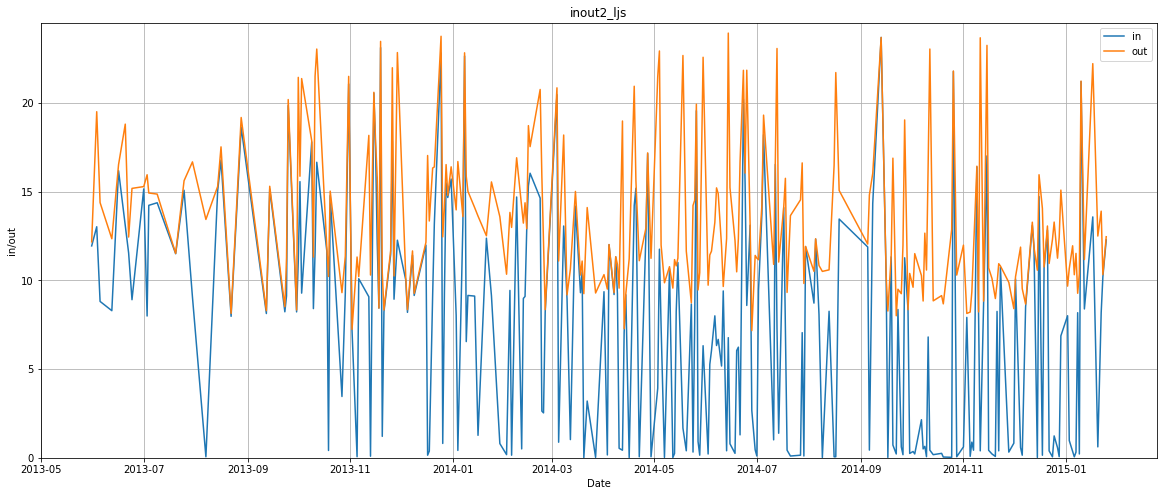

In [5]:
ulala["Date"] = pd.to_datetime(ulala["Date"])
#ulala["Arrival"] = pd.to_datetime(ulala["Arrival"])

plt.figure(figsize=(20,8))
plt.plot(ulala.Date,ulala.Arrival)
plt.plot(ulala.Date,ulala.Departure)
plt.title("inout2_ljs")
plt.xlabel("Date")
plt.ylabel("in/out")
plt.ylim(0,24.5)
plt.grid()
plt.legend(['in','out'])
plt.show()

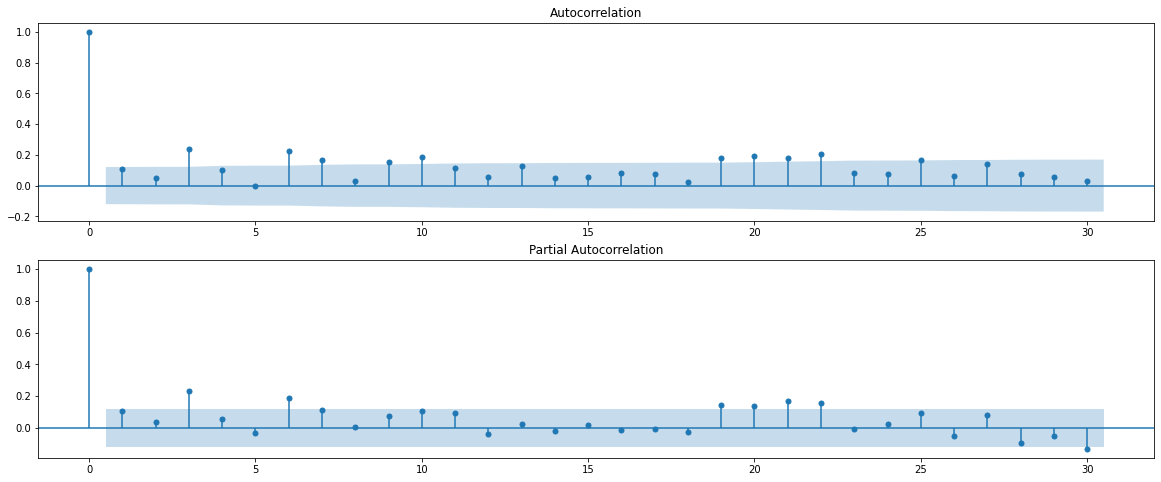

In [6]:
import statsmodels.api as sm

timeSeriesA = ulala.loc[:, ["Date","Arrival"]] ### 입장 시간
timeSeriesA.index = timeSeriesA.Date
tsA = timeSeriesA.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA, lags=30, ax=ax1) ### 그래프를 보면 7일 단위로 자기상관이 높음
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA, lags=30, ax=ax2)

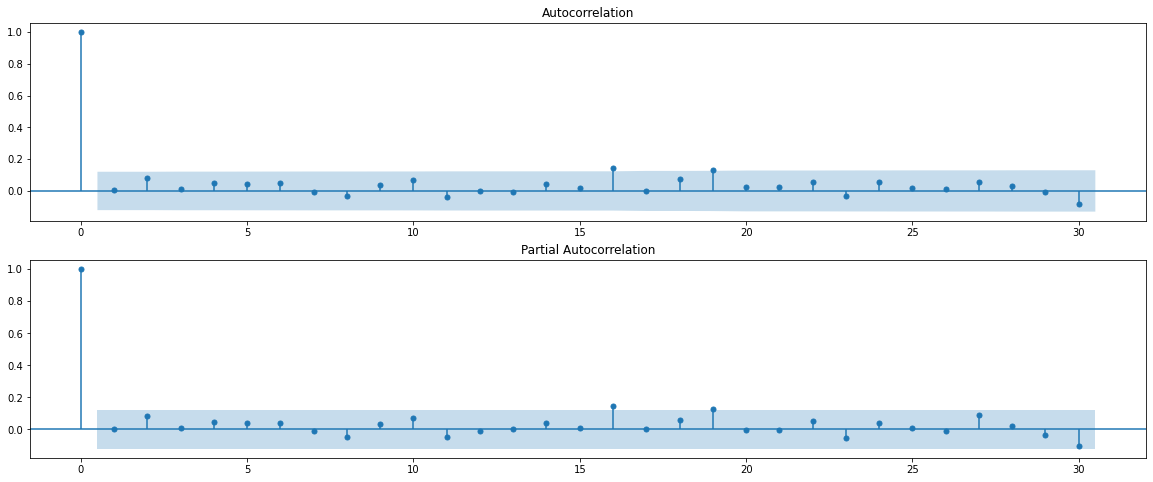

In [7]:
timeSeriesD = ulala.loc[:, ["Date","Departure"]] ### 퇴장 시간
timeSeriesD.index = timeSeriesD.Date
tsD = timeSeriesD.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsD, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsD, lags=30, ax=ax2)

<Figure size 432x288 with 0 Axes>

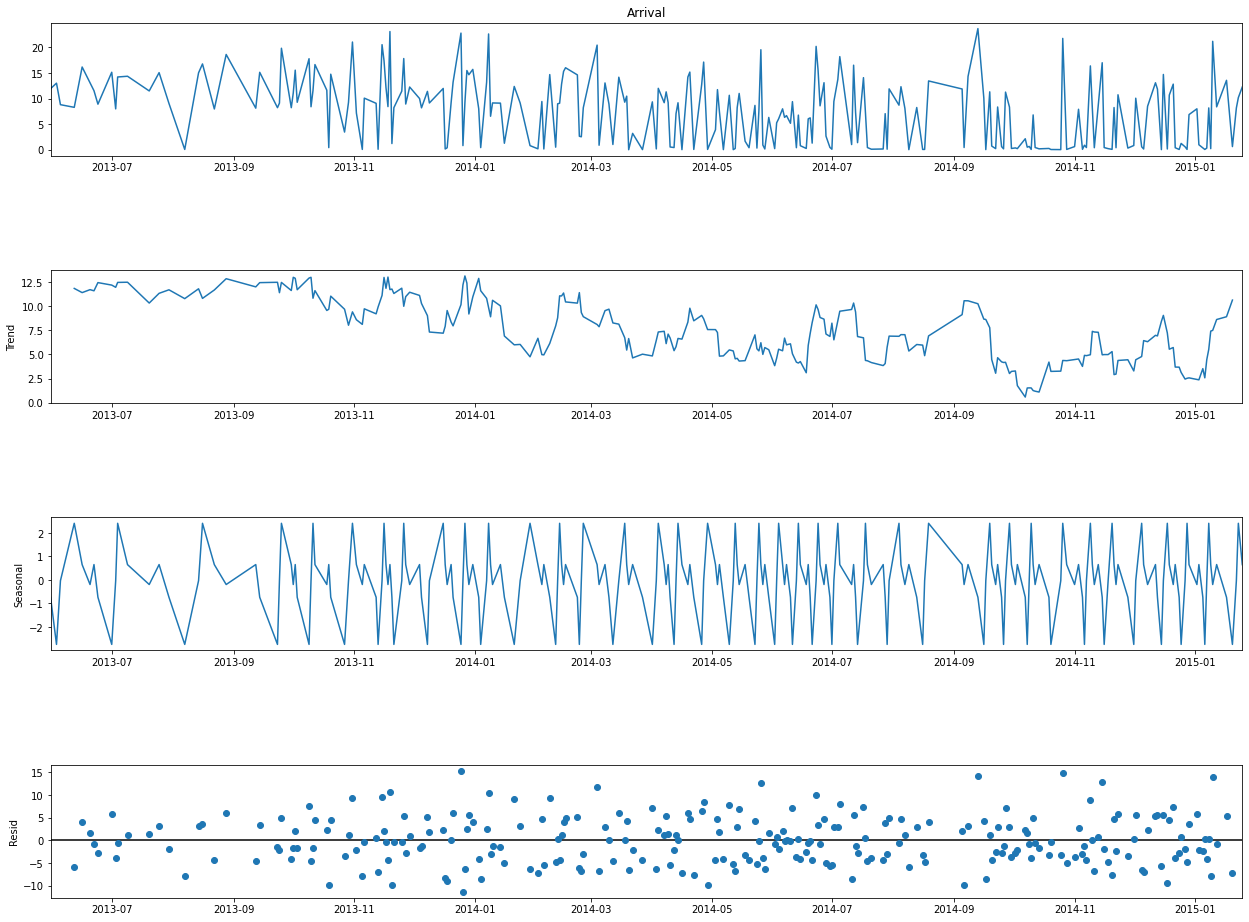

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultA = seasonal_decompose(tsA['Arrival'], model='additive',period=7) ### 7일 단위로 보면 seasonal함

fig = plt.figure()
fig = resultA.plot()
fig.set_size_inches(20, 15)

<Figure size 432x288 with 0 Axes>

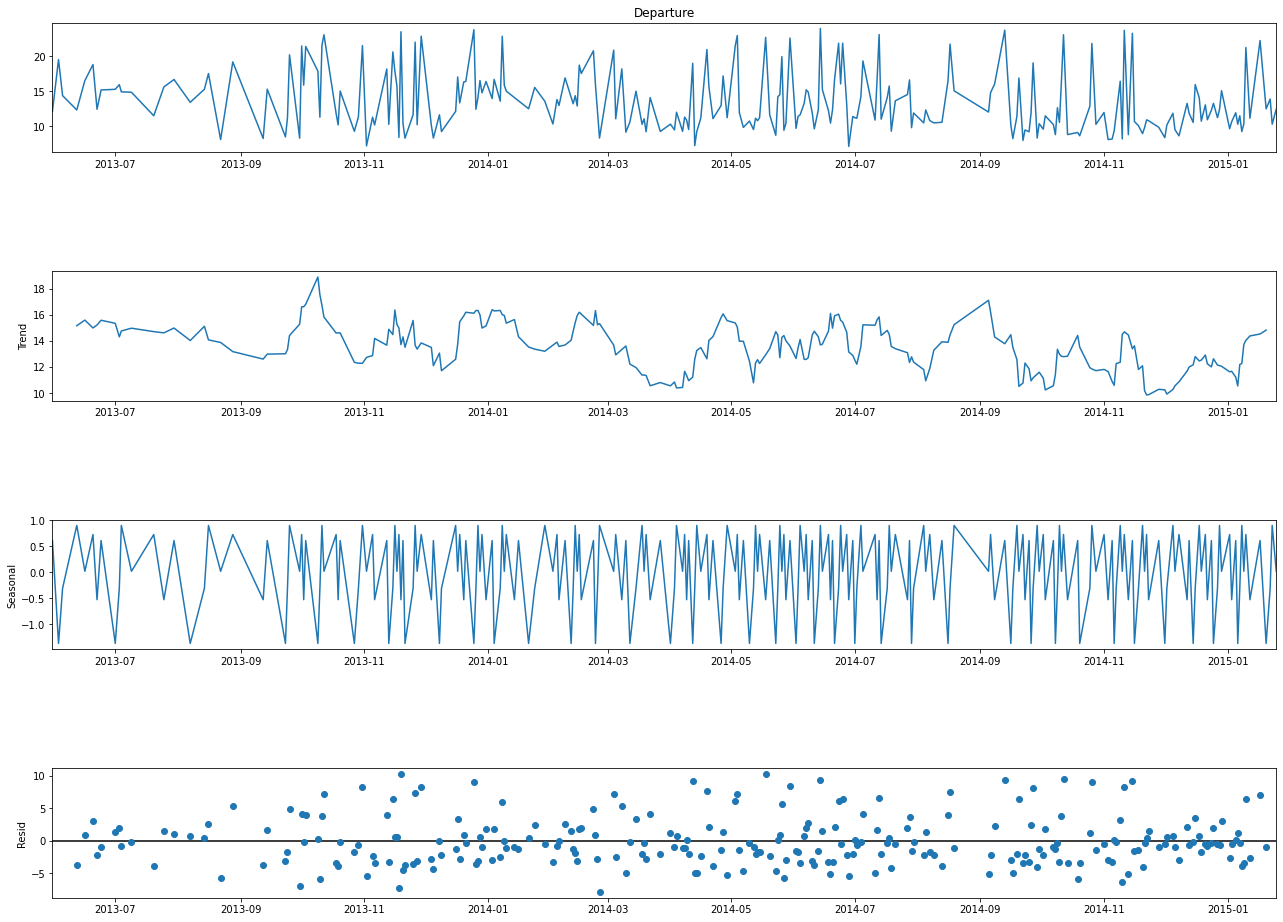

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultD = seasonal_decompose(tsD['Departure'], model='additive',period=7) ### 마찬가지로 7일 단위

fig = plt.figure()
fig = resultD.plot()
fig.set_size_inches(20, 15)

In [10]:
### 차분할 필요는 없을 것 같다는 걸 보이기 위함
"""
tsA_diff = tsA - tsA.shift()
fig = plt.figure(figsize=(20,8))
# plt.plot(ts_diff)

ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)
"""

'\ntsA_diff = tsA - tsA.shift()\nfig = plt.figure(figsize=(20,8))\n# plt.plot(ts_diff)\n\nax3 = fig.add_subplot(211)\nfig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)\nax4 = fig.add_subplot(212)\nfig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)\n'

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


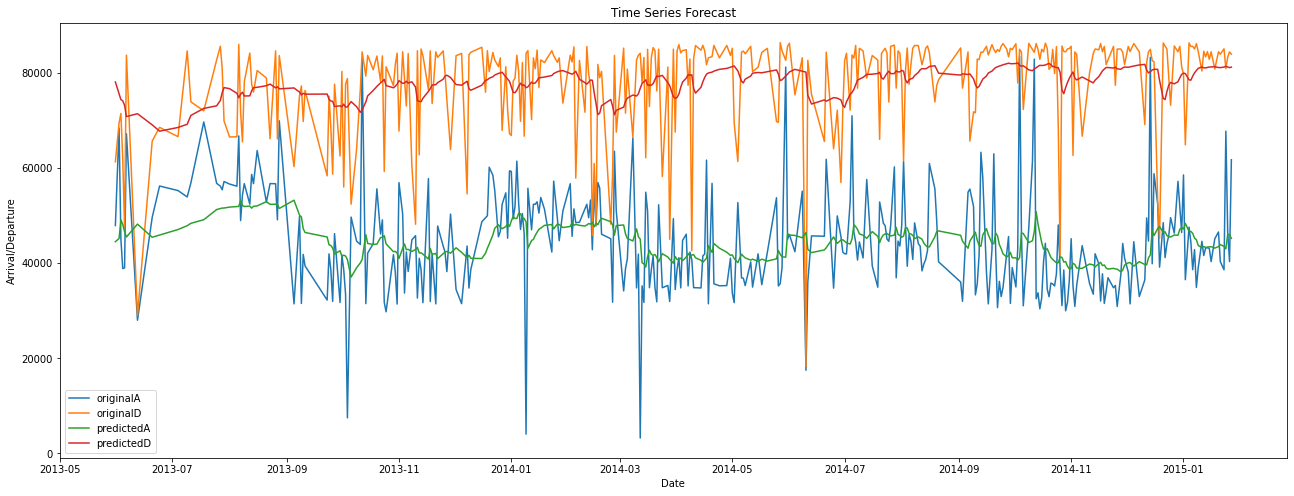

In [9]:
### 결과 ARIMA로 빨리 보고 싶으면 이걸로 보는 게 나음
"""
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

#fit model
modelA = ARIMA(tsA, order=(1,0,2))
modelA_fit = modelA.fit()
modelD = ARIMA(tsD, order=(1,0,2))
modelD_fit = modelD.fit()

#predict
forecastA = modelA_fit.predict(typ='levels')
forecastD = modelD_fit.predict(typ='levels')

#visualization
plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")

plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.legend()
plt.show()
"""

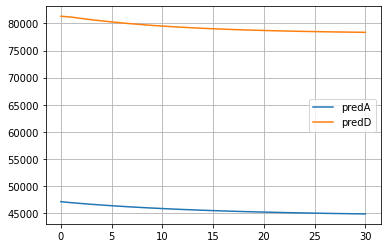

In [10]:
### ARIMA랑 SARIMA랑 forecast 조금 다름. 이건 ARIMA
"""
foreA = modelA_fit.forecast(steps=31)
foreD = modelD_fit.forecast(steps=31)
predA = foreA[0].tolist()
predD = foreD[0].tolist()
plt.plot(predA, label = "predA")
plt.plot(predD, label = "predD")
plt.legend()
plt.grid()
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

### SARIMA에 파라미터 넣어서 최선의 모델 구함
### d=0으로 놓고 돌리면 243번 밖에 계산 안 할 것임. 지금은 721번 돌아감

# Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 3)

p = q = range(0,4)
d = range(0,2)
m = (4,7,12)

cnt = 1

import itertools
import warnings

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, m))
# pdq = [[0,0,0],[0,0,1],[0,0,2],[1,0,0],[1,0,1],[1,0,2],[2,0,0],[2,0,1],[2,0,2]]

# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]

warnings.filterwarnings("ignore") # specify to ignore warning messages

opt_aic = 10000
opt_param = []
opt_param_seasonal = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tsA,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{} - AIC:{} - cnt:{}'.format(param, param_seasonal, results.aic, cnt))
            
            cnt = cnt + 1
            
            if opt_aic > results.aic:
                opt_aic = results.aic
                opt_param = param
                opt_param_seasonal = param_seasonal
            
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 4) - AIC:1949.2037215442065 - cnt:1
SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:1949.2037215442065 - cnt:2
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1949.2037215442065 - cnt:3
SARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC:1850.1614897555758 - cnt:4
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:1818.139753943446 - cnt:5
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1802.6047672824284 - cnt:6
SARIMA(0, 0, 0)x(0, 0, 2, 4) - AIC:1796.1446240815117 - cnt:7
SARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:1753.317214191149 - cnt:8
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1691.1134490551376 - cnt:9
SARIMA(0, 0, 0)x(0, 0, 3, 4) - AIC:1754.9063988784071 - cnt:10
SARIMA(0, 0, 0)x(0, 0, 3, 7) - AIC:1675.1485569837637 - cnt:11
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:1585.5680036592153 - cnt:12
SARIMA(0, 0, 0)x(0, 1, 0, 4) - AIC:1846.5855515664637 - cnt:13
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1803.4069673365877 - cnt:14
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1801.4707834849987 - cnt:15
SARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC:1669.75555440861 - cnt:16


SARIMA(0, 0, 1)x(1, 0, 3, 7) - AIC:1566.9982649317508 - cnt:131
SARIMA(0, 0, 1)x(1, 0, 3, 12) - AIC:1498.6378603362214 - cnt:132
SARIMA(0, 0, 1)x(1, 1, 0, 4) - AIC:1768.2293035781192 - cnt:133
SARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:1718.6987327699055 - cnt:134
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1657.4189466831085 - cnt:135
SARIMA(0, 0, 1)x(1, 1, 1, 4) - AIC:1667.7516241215533 - cnt:136
SARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:1627.6968440339083 - cnt:137
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1588.2126696133812 - cnt:138
SARIMA(0, 0, 1)x(1, 1, 2, 4) - AIC:1642.037295211068 - cnt:139
SARIMA(0, 0, 1)x(1, 1, 2, 7) - AIC:1583.379012705895 - cnt:140
SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:1510.901539372846 - cnt:141
SARIMA(0, 0, 1)x(1, 1, 3, 4) - AIC:1616.0212391074147 - cnt:142
SARIMA(0, 0, 1)x(1, 1, 3, 7) - AIC:1541.0211295212207 - cnt:143
SARIMA(0, 0, 1)x(1, 1, 3, 12) - AIC:1427.118515247093 - cnt:144
SARIMA(0, 0, 1)x(2, 0, 0, 4) - AIC:1746.2823037836852 - cnt:145
SARIMA(0, 0, 1)x(2, 0, 0, 7) - AIC:1694

SARIMA(0, 0, 2)x(2, 1, 2, 4) - AIC:1637.7780841533645 - cnt:259
SARIMA(0, 0, 2)x(2, 1, 2, 7) - AIC:1579.2783095136597 - cnt:260
SARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:1506.0258627656374 - cnt:261
SARIMA(0, 0, 2)x(2, 1, 3, 4) - AIC:1612.7840990734908 - cnt:262
SARIMA(0, 0, 2)x(2, 1, 3, 7) - AIC:1535.947178142315 - cnt:263
SARIMA(0, 0, 2)x(2, 1, 3, 12) - AIC:1419.214267059454 - cnt:264
SARIMA(0, 0, 2)x(3, 0, 0, 4) - AIC:1702.3766523485303 - cnt:265
SARIMA(0, 0, 2)x(3, 0, 0, 7) - AIC:1613.1205132449254 - cnt:266
SARIMA(0, 0, 2)x(3, 0, 0, 12) - AIC:1525.124436009522 - cnt:267
SARIMA(0, 0, 2)x(3, 0, 1, 4) - AIC:1637.6668499415405 - cnt:268
SARIMA(0, 0, 2)x(3, 0, 1, 7) - AIC:1578.133049328654 - cnt:269
SARIMA(0, 0, 2)x(3, 0, 1, 12) - AIC:1505.79814089918 - cnt:270
SARIMA(0, 0, 2)x(3, 0, 2, 4) - AIC:1637.3934234416831 - cnt:271
SARIMA(0, 0, 2)x(3, 0, 2, 7) - AIC:1572.796579648935 - cnt:272
SARIMA(0, 0, 2)x(3, 0, 2, 12) - AIC:1503.193415397046 - cnt:273
SARIMA(0, 0, 2)x(3, 0, 3, 4) - AIC:1625.231

SARIMA(0, 1, 0)x(0, 0, 2, 4) - AIC:1809.2964769908267 - cnt:391
SARIMA(0, 1, 0)x(0, 0, 2, 7) - AIC:1776.1575683708475 - cnt:392
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1702.9862199999839 - cnt:393
SARIMA(0, 1, 0)x(0, 0, 3, 4) - AIC:1784.390579237343 - cnt:394
SARIMA(0, 1, 0)x(0, 0, 3, 7) - AIC:1726.9267769827402 - cnt:395
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:1615.0534901015776 - cnt:396
SARIMA(0, 1, 0)x(0, 1, 0, 4) - AIC:2022.7071471186364 - cnt:397
SARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:1977.745586049107 - cnt:398
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1974.5494974596888 - cnt:399
SARIMA(0, 1, 0)x(0, 1, 1, 4) - AIC:1828.6835978591553 - cnt:400
SARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:1786.5674864068856 - cnt:401
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1725.535701291613 - cnt:402
SARIMA(0, 1, 0)x(0, 1, 2, 4) - AIC:1803.790976765293 - cnt:403
SARIMA(0, 1, 0)x(0, 1, 2, 7) - AIC:1735.8093001443863 - cnt:404
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1641.018050230478 - cnt:405
SARIMA(0, 1, 0)x(0, 1, 3, 4) - AIC:1771.

SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1656.4960847636644 - cnt:519
SARIMA(0, 1, 1)x(1, 1, 1, 4) - AIC:1656.4955338364446 - cnt:520
SARIMA(0, 1, 1)x(1, 1, 1, 7) - AIC:1610.7526179325334 - cnt:521
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1569.5525431356007 - cnt:522
SARIMA(0, 1, 1)x(1, 1, 2, 4) - AIC:1630.2604221582508 - cnt:523
SARIMA(0, 1, 1)x(1, 1, 2, 7) - AIC:1565.8068199655277 - cnt:524
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1489.4626912870692 - cnt:525
SARIMA(0, 1, 1)x(1, 1, 3, 4) - AIC:1603.1362693886363 - cnt:526
SARIMA(0, 1, 1)x(1, 1, 3, 7) - AIC:1525.4366173306998 - cnt:527
SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:1411.7160144143213 - cnt:528
SARIMA(0, 1, 1)x(2, 0, 0, 4) - AIC:1651.6823662586532 - cnt:529
SARIMA(0, 1, 1)x(2, 0, 0, 7) - AIC:1619.3988068908966 - cnt:530
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1555.2885289267053 - cnt:531
SARIMA(0, 1, 1)x(2, 0, 1, 4) - AIC:1652.3999803619015 - cnt:532
SARIMA(0, 1, 1)x(2, 0, 1, 7) - AIC:1618.4269191185622 - cnt:533
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC

SARIMA(0, 1, 2)x(2, 1, 3, 7) - AIC:1517.600092976634 - cnt:647
SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:1402.063244396852 - cnt:648
SARIMA(0, 1, 2)x(3, 0, 0, 4) - AIC:1630.2294247553157 - cnt:649
SARIMA(0, 1, 2)x(3, 0, 0, 7) - AIC:1574.6691087716563 - cnt:650
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1484.3836174084154 - cnt:651
SARIMA(0, 1, 2)x(3, 0, 1, 4) - AIC:1632.2285909225807 - cnt:652
SARIMA(0, 1, 2)x(3, 0, 1, 7) - AIC:1576.6604201699547 - cnt:653
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1486.0628975998225 - cnt:654
SARIMA(0, 1, 2)x(3, 0, 2, 4) - AIC:1630.3903633663367 - cnt:655
SARIMA(0, 1, 2)x(3, 0, 2, 7) - AIC:1575.7863049085736 - cnt:656
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1486.2602104470748 - cnt:657
SARIMA(0, 1, 2)x(3, 0, 3, 4) - AIC:1611.120142734896 - cnt:658
SARIMA(0, 1, 2)x(3, 0, 3, 7) - AIC:1557.2178665072333 - cnt:659
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:1468.017138698575 - cnt:660
SARIMA(0, 1, 2)x(3, 1, 0, 4) - AIC:1672.749316306369 - cnt:661
SARIMA(0, 1, 2)x(3, 1, 0, 7) - AIC:1575.

SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:1654.0290827109557 - cnt:777
SARIMA(1, 0, 0)x(0, 0, 3, 4) - AIC:1735.911115747208 - cnt:778
SARIMA(1, 0, 0)x(0, 0, 3, 7) - AIC:1659.5429535465216 - cnt:779
SARIMA(1, 0, 0)x(0, 0, 3, 12) - AIC:1559.1789414398322 - cnt:780
SARIMA(1, 0, 0)x(0, 1, 0, 4) - AIC:1848.5394498269698 - cnt:781
SARIMA(1, 0, 0)x(0, 1, 0, 7) - AIC:1805.312872494638 - cnt:782
SARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1803.2776073362484 - cnt:783
SARIMA(1, 0, 0)x(0, 1, 1, 4) - AIC:1671.7524390783797 - cnt:784
SARIMA(1, 0, 0)x(0, 1, 1, 7) - AIC:1635.110497103446 - cnt:785
SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:1593.168545622494 - cnt:786
SARIMA(1, 0, 0)x(0, 1, 2, 4) - AIC:1649.893740922705 - cnt:787
SARIMA(1, 0, 0)x(0, 1, 2, 7) - AIC:1589.74666699916 - cnt:788
SARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:1516.1426779332078 - cnt:789
SARIMA(1, 0, 0)x(0, 1, 3, 4) - AIC:1622.9463329436767 - cnt:790
SARIMA(1, 0, 0)x(0, 1, 3, 7) - AIC:1548.7272325789813 - cnt:791
SARIMA(1, 0, 0)x(0, 1, 3, 12) - AIC:1436.6

SARIMA(1, 0, 1)x(1, 1, 1, 7) - AIC:1628.5070968922214 - cnt:905
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:1591.6454490117767 - cnt:906
SARIMA(1, 0, 1)x(1, 1, 2, 4) - AIC:1643.9129717213978 - cnt:907
SARIMA(1, 0, 1)x(1, 1, 2, 7) - AIC:1583.5497406609584 - cnt:908
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:1511.8794848894138 - cnt:909
SARIMA(1, 0, 1)x(1, 1, 3, 4) - AIC:1618.024525404262 - cnt:910
SARIMA(1, 0, 1)x(1, 1, 3, 7) - AIC:1542.0478604239997 - cnt:911
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:1427.5312461565272 - cnt:912
SARIMA(1, 0, 1)x(2, 0, 0, 4) - AIC:1645.261150403714 - cnt:913
SARIMA(1, 0, 1)x(2, 0, 0, 7) - AIC:1613.8762149985487 - cnt:914
SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:1551.5342086268902 - cnt:915
SARIMA(1, 0, 1)x(2, 0, 1, 4) - AIC:1646.211615847411 - cnt:916
SARIMA(1, 0, 1)x(2, 0, 1, 7) - AIC:1617.4281951158 - cnt:917
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:1574.693291869181 - cnt:918
SARIMA(1, 0, 1)x(2, 0, 2, 4) - AIC:1642.564549047253 - cnt:919
SARIMA(1, 0, 1)x(2, 0, 2, 7) - AIC:1607.078

SARIMA(1, 0, 2)x(3, 0, 0, 4) - AIC:1624.2941837674994 - cnt:1033
SARIMA(1, 0, 2)x(3, 0, 0, 7) - AIC:1569.9000435877351 - cnt:1034
SARIMA(1, 0, 2)x(3, 0, 0, 12) - AIC:1481.393817027865 - cnt:1035
SARIMA(1, 0, 2)x(3, 0, 1, 4) - AIC:1634.9766923003592 - cnt:1036
SARIMA(1, 0, 2)x(3, 0, 1, 7) - AIC:1575.0928262967882 - cnt:1037
SARIMA(1, 0, 2)x(3, 0, 1, 12) - AIC:1483.3054551001346 - cnt:1038
SARIMA(1, 0, 2)x(3, 0, 2, 4) - AIC:1636.0075682265242 - cnt:1039
SARIMA(1, 0, 2)x(3, 0, 2, 7) - AIC:1567.451971690132 - cnt:1040
SARIMA(1, 0, 2)x(3, 0, 2, 12) - AIC:1498.0266752418293 - cnt:1041
SARIMA(1, 0, 2)x(3, 0, 3, 4) - AIC:1625.8504087442057 - cnt:1042
SARIMA(1, 0, 2)x(3, 0, 3, 7) - AIC:1555.9778328966756 - cnt:1043
SARIMA(1, 0, 2)x(3, 0, 3, 12) - AIC:1479.733833524433 - cnt:1044
SARIMA(1, 0, 2)x(3, 1, 0, 4) - AIC:1660.5937362553477 - cnt:1045
SARIMA(1, 0, 2)x(3, 1, 0, 7) - AIC:1570.1580028049207 - cnt:1046
SARIMA(1, 0, 2)x(3, 1, 0, 12) - AIC:1437.3774509916202 - cnt:1047
SARIMA(1, 0, 2)x(3, 1, 

SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1647.671686492688 - cnt:1161
SARIMA(1, 1, 0)x(0, 0, 3, 4) - AIC:1723.678984256876 - cnt:1162
SARIMA(1, 1, 0)x(0, 0, 3, 7) - AIC:1670.3872983212964 - cnt:1163
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:1568.8695818917222 - cnt:1164
SARIMA(1, 1, 0)x(0, 1, 0, 4) - AIC:1964.187001653068 - cnt:1165
SARIMA(1, 1, 0)x(0, 1, 0, 7) - AIC:1909.9222702660168 - cnt:1166
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1916.2886048185321 - cnt:1167
SARIMA(1, 1, 0)x(0, 1, 1, 4) - AIC:1768.33643022261 - cnt:1168
SARIMA(1, 1, 0)x(0, 1, 1, 7) - AIC:1720.4223111721362 - cnt:1169
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1675.3844317537291 - cnt:1170
SARIMA(1, 1, 0)x(0, 1, 2, 4) - AIC:1743.4679190154823 - cnt:1171
SARIMA(1, 1, 0)x(0, 1, 2, 7) - AIC:1673.4053345279544 - cnt:1172
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1594.9525897888966 - cnt:1173
SARIMA(1, 1, 0)x(0, 1, 3, 4) - AIC:1709.074992192322 - cnt:1174
SARIMA(1, 1, 0)x(0, 1, 3, 7) - AIC:1631.9120299506162 - cnt:1175
SARIMA(1, 1, 0)x(0, 1, 3, 

SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1650.12771089765 - cnt:1287
SARIMA(1, 1, 1)x(1, 1, 1, 4) - AIC:1658.3191034895517 - cnt:1288
SARIMA(1, 1, 1)x(1, 1, 1, 7) - AIC:1612.3937853144812 - cnt:1289
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1571.5471642909758 - cnt:1290
SARIMA(1, 1, 1)x(1, 1, 2, 4) - AIC:1632.1948043368977 - cnt:1291
SARIMA(1, 1, 1)x(1, 1, 2, 7) - AIC:1567.4782208929664 - cnt:1292
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1491.4363951562707 - cnt:1293
SARIMA(1, 1, 1)x(1, 1, 3, 4) - AIC:1605.0316338212197 - cnt:1294
SARIMA(1, 1, 1)x(1, 1, 3, 7) - AIC:1526.7169388136433 - cnt:1295
SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:1413.6298436918107 - cnt:1296
SARIMA(1, 1, 1)x(2, 0, 0, 4) - AIC:1646.6928750079878 - cnt:1297
SARIMA(1, 1, 1)x(2, 0, 0, 7) - AIC:1613.885501458957 - cnt:1298
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1551.2507865118268 - cnt:1299
SARIMA(1, 1, 1)x(2, 0, 1, 4) - AIC:1647.5020303351307 - cnt:1300
SARIMA(1, 1, 1)x(2, 0, 1, 7) - AIC:1613.232441297759 - cnt:1301
SARIMA(1, 1, 1)x(2, 0, 1

SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1492.4280720044496 - cnt:1413
SARIMA(1, 1, 2)x(2, 1, 3, 4) - AIC:1601.9197708733152 - cnt:1414
SARIMA(1, 1, 2)x(2, 1, 3, 7) - AIC:1519.4949125538183 - cnt:1415
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:1402.3241409420161 - cnt:1416
SARIMA(1, 1, 2)x(3, 0, 0, 4) - AIC:1626.4578409584246 - cnt:1417
SARIMA(1, 1, 2)x(3, 0, 0, 7) - AIC:1570.8109364941565 - cnt:1418
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1480.327794670929 - cnt:1419
SARIMA(1, 1, 2)x(3, 0, 1, 4) - AIC:1626.2407077395299 - cnt:1420
SARIMA(1, 1, 2)x(3, 0, 1, 7) - AIC:1572.744858508072 - cnt:1421
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1481.3232236930412 - cnt:1422
SARIMA(1, 1, 2)x(3, 0, 2, 4) - AIC:1626.1966893681044 - cnt:1423
SARIMA(1, 1, 2)x(3, 0, 2, 7) - AIC:1570.96953935072 - cnt:1424
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1482.4020367471362 - cnt:1425
SARIMA(1, 1, 2)x(3, 0, 3, 4) - AIC:1612.9908704281354 - cnt:1426
SARIMA(1, 1, 2)x(3, 0, 3, 7) - AIC:1558.733637021692 - cnt:1427
SARIMA(1, 1, 2)x(3, 0, 3,

SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1714.7615954061566 - cnt:1542
SARIMA(2, 0, 0)x(0, 0, 2, 4) - AIC:1738.7027086116289 - cnt:1543
SARIMA(2, 0, 0)x(0, 0, 2, 7) - AIC:1697.4567768354318 - cnt:1544
SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:1633.8442420249369 - cnt:1545
SARIMA(2, 0, 0)x(0, 0, 3, 4) - AIC:1716.1585482367793 - cnt:1546
SARIMA(2, 0, 0)x(0, 0, 3, 7) - AIC:1646.9630461439797 - cnt:1547
SARIMA(2, 0, 0)x(0, 0, 3, 12) - AIC:1550.7670559948363 - cnt:1548
SARIMA(2, 0, 0)x(0, 1, 0, 4) - AIC:1841.8303769892996 - cnt:1549
SARIMA(2, 0, 0)x(0, 1, 0, 7) - AIC:1800.8120971757962 - cnt:1550
SARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:1796.3298887300293 - cnt:1551
SARIMA(2, 0, 0)x(0, 1, 1, 4) - AIC:1673.173156113742 - cnt:1552
SARIMA(2, 0, 0)x(0, 1, 1, 7) - AIC:1636.9193014328312 - cnt:1553
SARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:1594.7338672404596 - cnt:1554
SARIMA(2, 0, 0)x(0, 1, 2, 4) - AIC:1650.9889202171134 - cnt:1555
SARIMA(2, 0, 0)x(0, 1, 2, 7) - AIC:1591.686217446265 - cnt:1556
SARIMA(2, 0, 0)x(0, 1,

SARIMA(2, 0, 1)x(1, 0, 3, 12) - AIC:1477.5455887611893 - cnt:1668
SARIMA(2, 0, 1)x(1, 1, 0, 4) - AIC:1734.8449762311066 - cnt:1669
SARIMA(2, 0, 1)x(1, 1, 0, 7) - AIC:1708.7009923016267 - cnt:1670
SARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:1643.145039274772 - cnt:1671
SARIMA(2, 0, 1)x(1, 1, 1, 4) - AIC:1668.6362045573462 - cnt:1672
SARIMA(2, 0, 1)x(1, 1, 1, 7) - AIC:1630.3275505751435 - cnt:1673
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:1592.589749128324 - cnt:1674
SARIMA(2, 0, 1)x(1, 1, 2, 4) - AIC:1643.383590230906 - cnt:1675
SARIMA(2, 0, 1)x(1, 1, 2, 7) - AIC:1584.9138129498767 - cnt:1676
SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:1513.0436660473451 - cnt:1677
SARIMA(2, 0, 1)x(1, 1, 3, 4) - AIC:1617.7675979460887 - cnt:1678
SARIMA(2, 0, 1)x(1, 1, 3, 7) - AIC:1542.5283191052204 - cnt:1679
SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:1428.977784156866 - cnt:1680
SARIMA(2, 0, 1)x(2, 0, 0, 4) - AIC:1641.4489004613106 - cnt:1681
SARIMA(2, 0, 1)x(2, 0, 0, 7) - AIC:1611.3025177962631 - cnt:1682
SARIMA(2, 0, 1)x(2, 0, 0

SARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:1509.056038553841 - cnt:1794
SARIMA(2, 0, 2)x(2, 1, 2, 4) - AIC:1630.8887626338083 - cnt:1795
SARIMA(2, 0, 2)x(2, 1, 2, 7) - AIC:1567.9562079618768 - cnt:1796
SARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:1503.7834513620915 - cnt:1797
SARIMA(2, 0, 2)x(2, 1, 3, 4) - AIC:1607.0358319575248 - cnt:1798
SARIMA(2, 0, 2)x(2, 1, 3, 7) - AIC:1526.6933388808893 - cnt:1799
SARIMA(2, 0, 2)x(2, 1, 3, 12) - AIC:1414.502954634036 - cnt:1800
SARIMA(2, 0, 2)x(3, 0, 0, 4) - AIC:1620.5394938800873 - cnt:1801
SARIMA(2, 0, 2)x(3, 0, 0, 7) - AIC:1566.1143681642154 - cnt:1802
SARIMA(2, 0, 2)x(3, 0, 0, 12) - AIC:1476.6486662634288 - cnt:1803
SARIMA(2, 0, 2)x(3, 0, 1, 4) - AIC:1623.6864428448241 - cnt:1804
SARIMA(2, 0, 2)x(3, 0, 1, 7) - AIC:1568.5952886878408 - cnt:1805
SARIMA(2, 0, 2)x(3, 0, 1, 12) - AIC:1475.6300566517768 - cnt:1806
SARIMA(2, 0, 2)x(3, 0, 2, 4) - AIC:1624.5908839681074 - cnt:1807
SARIMA(2, 0, 2)x(3, 0, 2, 7) - AIC:1557.671020565449 - cnt:1808
SARIMA(2, 0, 2)x(3, 0, 

SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:1402.4247280261502 - cnt:1920
SARIMA(2, 1, 0)x(0, 0, 0, 4) - AIC:1736.858612603422 - cnt:1921
SARIMA(2, 1, 0)x(0, 0, 0, 7) - AIC:1736.858612603422 - cnt:1922
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1736.858612603422 - cnt:1923
SARIMA(2, 1, 0)x(0, 0, 1, 4) - AIC:1720.2188419451518 - cnt:1924
SARIMA(2, 1, 0)x(0, 0, 1, 7) - AIC:1702.5029126886463 - cnt:1925
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1672.3377090893 - cnt:1926
SARIMA(2, 1, 0)x(0, 0, 2, 4) - AIC:1695.4230949168627 - cnt:1927
SARIMA(2, 1, 0)x(0, 0, 2, 7) - AIC:1659.5498774166285 - cnt:1928
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1594.3590427732279 - cnt:1929
SARIMA(2, 1, 0)x(0, 0, 3, 4) - AIC:1673.2313875517812 - cnt:1930
SARIMA(2, 1, 0)x(0, 0, 3, 7) - AIC:1613.838908981188 - cnt:1931
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:1519.0873400120713 - cnt:1932
SARIMA(2, 1, 0)x(0, 1, 0, 4) - AIC:1900.179982416439 - cnt:1933
SARIMA(2, 1, 0)x(0, 1, 0, 7) - AIC:1851.2314349066341 - cnt:1934
SARIMA(2, 1, 0)x(0, 1, 0, 12

SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1620.0328675293235 - cnt:2046
SARIMA(2, 1, 1)x(1, 0, 2, 4) - AIC:1640.445475950076 - cnt:2047
SARIMA(2, 1, 1)x(1, 0, 2, 7) - AIC:1604.9883276356293 - cnt:2048
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1546.4804188418507 - cnt:2049
SARIMA(2, 1, 1)x(1, 0, 3, 4) - AIC:1619.1572343489518 - cnt:2050
SARIMA(2, 1, 1)x(1, 0, 3, 7) - AIC:1563.3233507037412 - cnt:2051
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:1471.7685455769997 - cnt:2052
SARIMA(2, 1, 1)x(1, 1, 0, 4) - AIC:1752.7937820875309 - cnt:2053
SARIMA(2, 1, 1)x(1, 1, 0, 7) - AIC:1705.1986339010834 - cnt:2054
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1641.7948623699365 - cnt:2055
SARIMA(2, 1, 1)x(1, 1, 1, 4) - AIC:1658.6985103306774 - cnt:2056
SARIMA(2, 1, 1)x(1, 1, 1, 7) - AIC:1613.7931808590047 - cnt:2057
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1570.777463213601 - cnt:2058
SARIMA(2, 1, 1)x(1, 1, 2, 4) - AIC:1632.7196752860136 - cnt:2059
SARIMA(2, 1, 1)x(1, 1, 2, 7) - AIC:1569.3856994114967 - cnt:2060
SARIMA(2, 1, 1)x(1, 1,

SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:1467.253042183458 - cnt:2172
SARIMA(2, 1, 2)x(2, 1, 0, 4) - AIC:1699.7344833912625 - cnt:2173
SARIMA(2, 1, 2)x(2, 1, 0, 7) - AIC:1609.1229651930694 - cnt:2174
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1525.6577929179136 - cnt:2175
SARIMA(2, 1, 2)x(2, 1, 1, 4) - AIC:1636.1508819369806 - cnt:2176
SARIMA(2, 1, 2)x(2, 1, 1, 7) - AIC:1574.5460770911843 - cnt:2177
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1494.8750069542148 - cnt:2178
SARIMA(2, 1, 2)x(2, 1, 2, 4) - AIC:1626.756862849299 - cnt:2179
SARIMA(2, 1, 2)x(2, 1, 2, 7) - AIC:1562.7441913264004 - cnt:2180
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1488.115427901182 - cnt:2181
SARIMA(2, 1, 2)x(2, 1, 3, 4) - AIC:1601.0971709492437 - cnt:2182
SARIMA(2, 1, 2)x(2, 1, 3, 7) - AIC:1516.6623002812566 - cnt:2183
SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:1404.5403386103403 - cnt:2184
SARIMA(2, 1, 2)x(3, 0, 0, 4) - AIC:1618.9238687457273 - cnt:2185
SARIMA(2, 1, 2)x(3, 0, 0, 7) - AIC:1561.0915718414421 - cnt:2186
SARIMA(2, 1, 2)x(3, 0, 

SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1409.271443682886 - cnt:2298
SARIMA(2, 1, 3)x(3, 1, 2, 4) - AIC:1602.6039004899762 - cnt:2299
SARIMA(2, 1, 3)x(3, 1, 2, 7) - AIC:1520.0906340914098 - cnt:2300
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1412.1914639290032 - cnt:2301
SARIMA(2, 1, 3)x(3, 1, 3, 4) - AIC:1590.3835168681958 - cnt:2302
SARIMA(2, 1, 3)x(3, 1, 3, 7) - AIC:1510.1912372228903 - cnt:2303
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:1389.4988834895776 - cnt:2304
SARIMA(3, 0, 0)x(0, 0, 0, 4) - AIC:1729.807603726182 - cnt:2305
SARIMA(3, 0, 0)x(0, 0, 0, 7) - AIC:1729.807603726182 - cnt:2306
SARIMA(3, 0, 0)x(0, 0, 0, 12) - AIC:1729.807603726182 - cnt:2307
SARIMA(3, 0, 0)x(0, 0, 1, 4) - AIC:1719.3175297046237 - cnt:2308
SARIMA(3, 0, 0)x(0, 0, 1, 7) - AIC:1700.3784422991578 - cnt:2309
SARIMA(3, 0, 0)x(0, 0, 1, 12) - AIC:1671.3983747913908 - cnt:2310
SARIMA(3, 0, 0)x(0, 0, 2, 4) - AIC:1696.2764348862227 - cnt:2311
SARIMA(3, 0, 0)x(0, 0, 2, 7) - AIC:1660.0602173832976 - cnt:2312
SARIMA(3, 0, 0)x(0, 0, 2

SARIMA(3, 0, 1)x(0, 1, 3, 12) - AIC:1427.5303492650446 - cnt:2424
SARIMA(3, 0, 1)x(1, 0, 0, 4) - AIC:1664.191282143101 - cnt:2425
SARIMA(3, 0, 1)x(1, 0, 0, 7) - AIC:1644.895933808853 - cnt:2426
SARIMA(3, 0, 1)x(1, 0, 0, 12) - AIC:1613.4265993134688 - cnt:2427
SARIMA(3, 0, 1)x(1, 0, 1, 4) - AIC:1665.7581313495957 - cnt:2428
SARIMA(3, 0, 1)x(1, 0, 1, 7) - AIC:1643.2498436592193 - cnt:2429
SARIMA(3, 0, 1)x(1, 0, 1, 12) - AIC:1631.8238660195843 - cnt:2430
SARIMA(3, 0, 1)x(1, 0, 2, 4) - AIC:1650.9827759054933 - cnt:2431
SARIMA(3, 0, 1)x(1, 0, 2, 7) - AIC:1609.2971478618038 - cnt:2432
SARIMA(3, 0, 1)x(1, 0, 2, 12) - AIC:1569.3490676475706 - cnt:2433
SARIMA(3, 0, 1)x(1, 0, 3, 4) - AIC:1627.9649836003043 - cnt:2434
SARIMA(3, 0, 1)x(1, 0, 3, 7) - AIC:1567.5671177092854 - cnt:2435
SARIMA(3, 0, 1)x(1, 0, 3, 12) - AIC:1499.0288829677504 - cnt:2436
SARIMA(3, 0, 1)x(1, 1, 0, 4) - AIC:1741.286367642159 - cnt:2437
SARIMA(3, 0, 1)x(1, 1, 0, 7) - AIC:1697.235615408197 - cnt:2438
SARIMA(3, 0, 1)x(1, 1, 0

SARIMA(3, 0, 2)x(2, 0, 1, 12) - AIC:1555.5275389443213 - cnt:2550
SARIMA(3, 0, 2)x(2, 0, 2, 4) - AIC:1647.452355190543 - cnt:2551
SARIMA(3, 0, 2)x(2, 0, 2, 7) - AIC:1598.7214880660558 - cnt:2552
SARIMA(3, 0, 2)x(2, 0, 2, 12) - AIC:1551.7036715020058 - cnt:2553
SARIMA(3, 0, 2)x(2, 0, 3, 4) - AIC:1618.7514848569942 - cnt:2554
SARIMA(3, 0, 2)x(2, 0, 3, 7) - AIC:1556.184571557486 - cnt:2555
SARIMA(3, 0, 2)x(2, 0, 3, 12) - AIC:1480.3961777390691 - cnt:2556
SARIMA(3, 0, 2)x(2, 1, 0, 4) - AIC:1673.0005388046634 - cnt:2557
SARIMA(3, 0, 2)x(2, 1, 0, 7) - AIC:1593.287280472889 - cnt:2558
SARIMA(3, 0, 2)x(2, 1, 0, 12) - AIC:1513.2335593218868 - cnt:2559
SARIMA(3, 0, 2)x(2, 1, 1, 4) - AIC:1633.5535649486005 - cnt:2560
SARIMA(3, 0, 2)x(2, 1, 1, 7) - AIC:1570.692420380825 - cnt:2561
SARIMA(3, 0, 2)x(2, 1, 1, 12) - AIC:1496.4910361721163 - cnt:2562
SARIMA(3, 0, 2)x(2, 1, 2, 4) - AIC:1630.4484316085707 - cnt:2563
SARIMA(3, 0, 2)x(2, 1, 2, 7) - AIC:1573.4807626161582 - cnt:2564
SARIMA(3, 0, 2)x(2, 1, 2

SARIMA(3, 0, 3)x(3, 0, 3, 12) - AIC:1466.641071291529 - cnt:2676
SARIMA(3, 0, 3)x(3, 1, 0, 4) - AIC:1623.129347304549 - cnt:2677
SARIMA(3, 0, 3)x(3, 1, 0, 7) - AIC:1553.552171126547 - cnt:2678
SARIMA(3, 0, 3)x(3, 1, 0, 12) - AIC:1420.0341945298642 - cnt:2679
SARIMA(3, 0, 3)x(3, 1, 1, 4) - AIC:1606.4450461908823 - cnt:2680
SARIMA(3, 0, 3)x(3, 1, 1, 7) - AIC:1523.9652864460895 - cnt:2681
SARIMA(3, 0, 3)x(3, 1, 1, 12) - AIC:1420.5205295227947 - cnt:2682
SARIMA(3, 0, 3)x(3, 1, 2, 4) - AIC:1598.8598883834416 - cnt:2683
SARIMA(3, 0, 3)x(3, 1, 2, 7) - AIC:1520.3713945483341 - cnt:2684
SARIMA(3, 0, 3)x(3, 1, 2, 12) - AIC:1423.080045055867 - cnt:2685
SARIMA(3, 0, 3)x(3, 1, 3, 4) - AIC:1596.541961538665 - cnt:2686
SARIMA(3, 0, 3)x(3, 1, 3, 7) - AIC:1509.286734786042 - cnt:2687
SARIMA(3, 0, 3)x(3, 1, 3, 12) - AIC:1402.8728133570366 - cnt:2688
SARIMA(3, 1, 0)x(0, 0, 0, 4) - AIC:1722.1770397017094 - cnt:2689
SARIMA(3, 1, 0)x(0, 0, 0, 7) - AIC:1722.1770397017094 - cnt:2690
SARIMA(3, 1, 0)x(0, 0, 0, 

SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1567.5718950875003 - cnt:2802
SARIMA(3, 1, 1)x(0, 1, 2, 4) - AIC:1632.7465787734475 - cnt:2803
SARIMA(3, 1, 1)x(0, 1, 2, 7) - AIC:1569.9875562740544 - cnt:2804
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:1493.0029779520614 - cnt:2805
SARIMA(3, 1, 1)x(0, 1, 3, 4) - AIC:1607.4220443403233 - cnt:2806
SARIMA(3, 1, 1)x(0, 1, 3, 7) - AIC:1527.4690595591555 - cnt:2807
SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:1416.157892412023 - cnt:2808
SARIMA(3, 1, 1)x(1, 0, 0, 4) - AIC:1658.1442375011134 - cnt:2809
SARIMA(3, 1, 1)x(1, 0, 0, 7) - AIC:1640.8149660951299 - cnt:2810
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1611.0505489327702 - cnt:2811
SARIMA(3, 1, 1)x(1, 0, 1, 4) - AIC:1659.6591182293014 - cnt:2812
SARIMA(3, 1, 1)x(1, 0, 1, 7) - AIC:1642.515419620122 - cnt:2813
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1612.6410616686844 - cnt:2814
SARIMA(3, 1, 1)x(1, 0, 2, 4) - AIC:1641.1355505847698 - cnt:2815
SARIMA(3, 1, 1)x(1, 0, 2, 7) - AIC:1604.1445862978253 - cnt:2816
SARIMA(3, 1, 1)x(1, 0,

SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:1408.7825968687812 - cnt:2928
SARIMA(3, 1, 2)x(2, 0, 0, 4) - AIC:1637.5912642093058 - cnt:2929
SARIMA(3, 1, 2)x(2, 0, 0, 7) - AIC:1600.6045321327165 - cnt:2930
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1542.411158485102 - cnt:2931
SARIMA(3, 1, 2)x(2, 0, 1, 4) - AIC:1639.494569271651 - cnt:2932
SARIMA(3, 1, 2)x(2, 0, 1, 7) - AIC:1600.3291950059893 - cnt:2933
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1544.0986193209442 - cnt:2934
SARIMA(3, 1, 2)x(2, 0, 2, 4) - AIC:1635.984400550728 - cnt:2935
SARIMA(3, 1, 2)x(2, 0, 2, 7) - AIC:1602.2539735854689 - cnt:2936
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1544.9815594411846 - cnt:2937
SARIMA(3, 1, 2)x(2, 0, 3, 4) - AIC:1604.0980320875117 - cnt:2938
SARIMA(3, 1, 2)x(2, 0, 3, 7) - AIC:1558.4489616355181 - cnt:2939
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:1465.0054214084141 - cnt:2940
SARIMA(3, 1, 2)x(2, 1, 0, 4) - AIC:1692.1673497167674 - cnt:2941
SARIMA(3, 1, 2)x(2, 1, 0, 7) - AIC:1600.7868129398807 - cnt:2942
SARIMA(3, 1, 2)x(2, 1, 

SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1458.0473492141641 - cnt:3054
SARIMA(3, 1, 3)x(3, 0, 2, 4) - AIC:1608.2256503962421 - cnt:3055
SARIMA(3, 1, 3)x(3, 0, 2, 7) - AIC:1551.1132968711281 - cnt:3056
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1460.0337273577652 - cnt:3057
SARIMA(3, 1, 3)x(3, 0, 3, 4) - AIC:1598.3856590705127 - cnt:3058
SARIMA(3, 1, 3)x(3, 0, 3, 7) - AIC:1543.3138561673418 - cnt:3059
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:1454.828089111598 - cnt:3060
SARIMA(3, 1, 3)x(3, 1, 0, 4) - AIC:1637.5203716378064 - cnt:3061
SARIMA(3, 1, 3)x(3, 1, 0, 7) - AIC:1550.4207883488832 - cnt:3062
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:1416.2863685996047 - cnt:3063
SARIMA(3, 1, 3)x(3, 1, 1, 4) - AIC:1602.7759073001039 - cnt:3064
SARIMA(3, 1, 3)x(3, 1, 1, 7) - AIC:1515.5916879639021 - cnt:3065
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1405.3133953319048 - cnt:3066
SARIMA(3, 1, 3)x(3, 1, 2, 4) - AIC:1597.7094908913962 - cnt:3067
SARIMA(3, 1, 3)x(3, 1, 2, 7) - AIC:1511.0906218789876 - cnt:3068
SARIMA(3, 1, 3)x(3, 1

In [12]:
print(opt_param, opt_param_seasonal, results.aic)
# SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:6731.207845505058 - cnt:3072

(3, 1, 3) (3, 1, 3, 12) 1388.041421250587


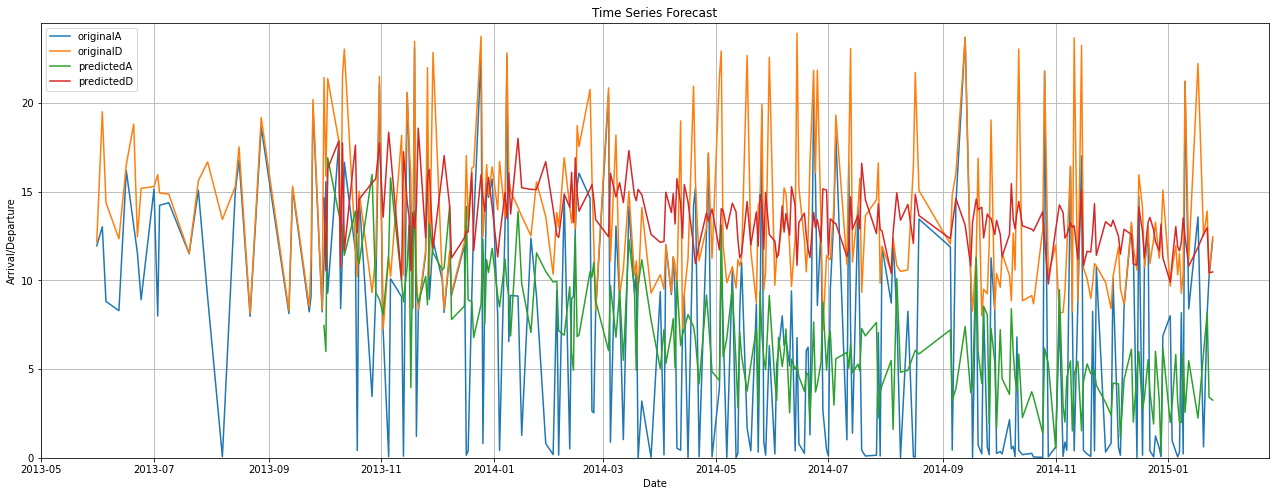

In [14]:
import statsmodels.api as sm
from datetime import datetime

### 예전 거 돌려보니까 (opt_param, opt_param_seasonal) = (1, 1, 3) (2, 1, 3, 12) 6731.207845505058
### 이것도 AIC 같음 SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:6731.207845505058 - cnt:3072

modelA = sm.tsa.statespace.SARIMAX(tsA, order=opt_param, seasonal_order=opt_param_seasonal)
modelD = sm.tsa.statespace.SARIMAX(tsD, order=opt_param, seasonal_order=opt_param_seasonal)

#modelA = sm.tsa.statespace.SARIMAX(tsA, order=(1, 1, 3), seasonal_order=(2, 1, 3, 12))
#modelD = sm.tsa.statespace.SARIMAX(tsD, order=(1, 1, 3), seasonal_order=(2, 1, 3, 12))

modelA_fit = modelA.fit()
modelD_fit = modelD.fit()
forecastA = modelA_fit.predict(start='2013-10-01',typ='levels')
forecastD = modelD_fit.predict(start='2013-10-01',typ='levels')

plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")
plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.ylim(0,24.5)
plt.grid()
plt.legend()
plt.show()

In [15]:
print(modelA_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Arrival   No. Observations:                  264
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -819.292
Date:                            Tue, 21 Sep 2021   AIC                           1664.584
Time:                                    16:07:45   BIC                           1710.415
Sample:                                         0   HQIC                          1683.028
                                            - 264                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8294      0.146     -5.665      0.000      -1.116      -0.542
ar.L2         -0.8955      0.105   

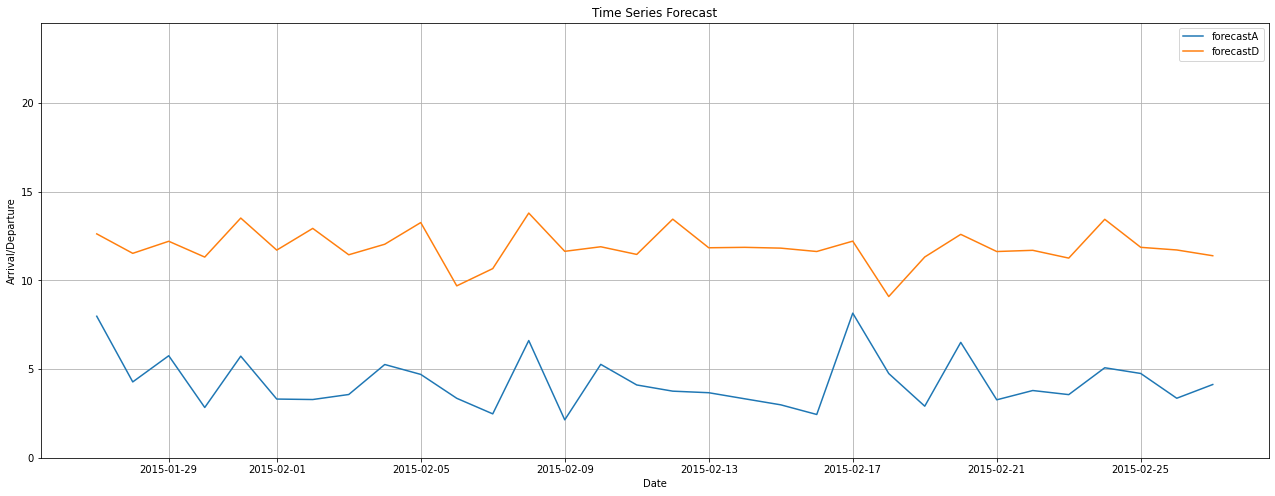

In [17]:
#modelA_fit.plot_diagnostics(figsize=(16, 8))
#modelD_fit.plot_diagnostics(figsize=(16, 8))
#plt.show()
index_future_dates=pd.date_range(start='2015-01-27',end='2015-02-27')
foreA = modelA_fit.predict(start=len(tsA), end=len(tsA)+31,typ='levels')
foreA.index=index_future_dates
foreD = modelD_fit.predict(start=len(tsD), end=len(tsD)+31,typ='levels')
foreD.index=index_future_dates

plt.figure(figsize=(22,8))
plt.plot(foreA, label = "forecastA")
plt.plot(foreD, label = "forecastD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.ylim(0,24.5)
plt.grid()
plt.legend()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
resultA = adfuller(tsA)
print('ADF Statistic: %f' % resultA[0])
print('p-value: %f' % resultA[1])
print('Critical Values:')
for key, value in resultA[4].items():
    print('\t%s: %.3f' % (key,value))

resultD = adfuller(tsD)
print('ADF Statistic: %f' % resultD[0])
print('p-value: %f' % resultD[1])
print('Critical Values:')
for key, value in resultD[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -3.940997
p-value: 0.001753
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
ADF Statistic: -16.067696
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


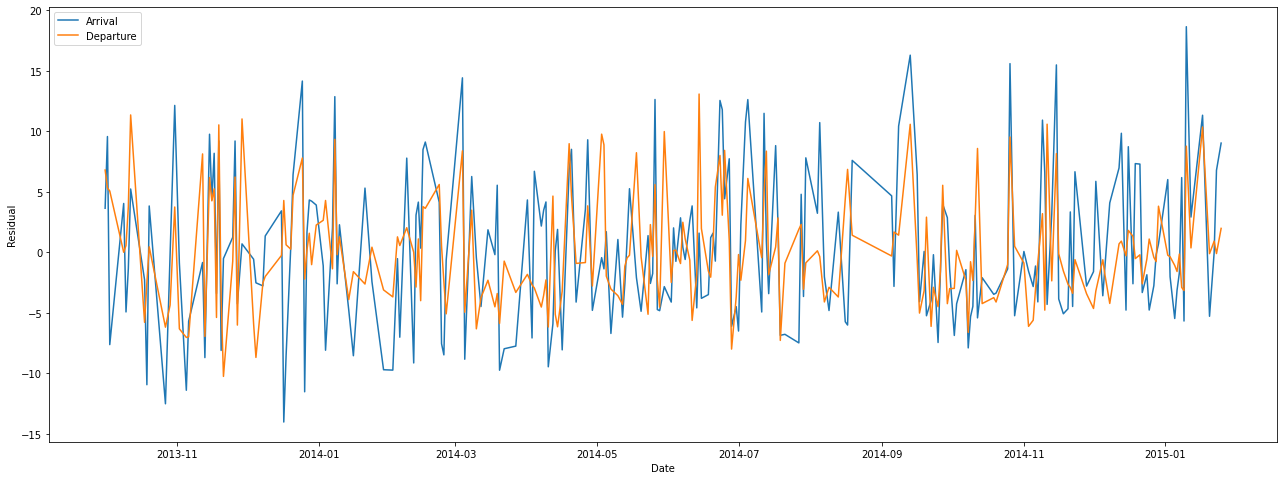

In [19]:
resiA = np.array(ulala[ulala.Date>='2013-10-01'].Arrival)-np.array(forecastA)
resiD = np.array(ulala[ulala.Date>='2013-10-01'].Departure)-np.array(forecastD)

plt.figure(figsize=(22,8))
plt.plot(ulala.Date[ulala.Date>='2013-10-01'],resiA, label='Arrival')
plt.plot(ulala.Date[ulala.Date>='2013-10-01'],resiD, label='Departure')

plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

In [20]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred)*100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred)*100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape}, index=[0])
    return df

In [21]:
scoring(np.array(ulala[ulala.Date>='2013-10-01'].Arrival), np.array(forecastA))

,R2,Corr,RMSE,MAPE
0,1.741,0.278,6.273,2740.646


In [22]:
scoring(np.array(ulala[ulala.Date>='2013-10-01'].Departure), np.array(forecastD))

,R2,Corr,RMSE,MAPE
0,-9.354,0.088,4.456,26.554
